# Trying gradient boosting algorithm

In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split, GridSearchCV

# Helper fuctions to evaluate our model.
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor
# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler

from sklearn.tree import plot_tree, export_text
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../texas_dataset/texas_level_encoded_numeric_value_dec_3.csv')

df.head(5)

,intake_type,intake_condition,sex_intake,breed,CoatColor,CoatPattern,age_intake_months,stay_length,intake_type_encoded,intake_condition_encoded,sex_intake_encoded,breed_encoded,CoatColor_encoded,CoatPattern_encoded
0,Stray,Normal,Female,Domestic_Shorthair_Mix,Black,Solid,1,31,2,3,0,1,0,1
1,Stray,Normal,Male,Other,Brown,Other,36,3,2,3,1,2,3,0
2,Stray,Normal,Male,Other,Brown,Tabby,1,68,2,3,1,2,3,2
3,Owner_Surrender,Normal,Female,Domestic_Shorthair_Mix,White_Mix,Solid,1,24,1,3,0,1,9,1
4,Stray,Normal,Male,Domestic_Shorthair_Mix,Black,Solid,1,30,2,3,1,1,0,1


In [3]:
print(df.duplicated().sum())

8994


In [4]:
df= df.drop_duplicates(keep='first')

In [5]:
print(df.duplicated().sum())

0


In [6]:
df.shape

(17085, 14)

In [7]:
(df['stay_length'].min(), df['stay_length'].max())

(0, 100)

## ⬇︎⬇︎ GradientBoostingRegressor simple  ⬇︎⬇︎

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Select relevant columns
# selected_columns = [ 'age_intake_months', 
#                     'breed_encoded', 'CoatColor_encoded', 
#                      'CoatPattern_encoded', 'stay_length']

selected_columns = [ 'age_intake_months', 
                     'intake_type_encoded', 'intake_condition_encoded',
                     'CoatColor_encoded', 'CoatPattern_encoded',  
                      'breed_encoded', 'stay_length']

df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('stay_length', axis=1)
y = df_selected['stay_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# xgb_model.fit(X_train, y_train)


# Make y_pred on the test set
# y_pred = np.round(gb_model.predict(X_test))
y_pred = np.round(gb_model.predict(X_test))



mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

# Calculating adjusted R-squared
n = len(y_test)
k = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Adjusted R-squared Score: %f" % adjusted_r2)


from joblib import dump
dump(gb_model, '../texas_strealit_app/gb_model.joblib')


Mean Squared Error: 499.0427275387767
Root Mean Squared Error: 22.33926425688135
Average Days Staying: 32.247585601404744
RMSE is less than Average Days Staying.
Mean Absolute Error: 17.627450980392158
R-squared Score: 0.279292
Adjusted R-squared Score: 0.278024


['../texas_strealit_app/gb_model.joblib']

In [18]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

age_intake_months           0.856597
intake_type_encoded         0.048377
intake_condition_encoded    0.043583
CoatColor_encoded           0.022021
breed_encoded               0.021444
CoatPattern_encoded         0.007978
dtype: float64


In [19]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

# Find rows where residuals are exactly 0
zero_residuals_df = df_residuals[df_residuals['Residuals'] == 0]

# Display rows where residuals are exactly 0
print('Rows with Residuals = 0:')
print(zero_residuals_df)

Rows with Residuals = 0:
       Actual  Predicted  Residuals
7033       25       25.0        0.0
14080      28       28.0        0.0
17479      40       40.0        0.0
23705      59       59.0        0.0
17813      20       20.0        0.0
23625      15       15.0        0.0
19733      39       39.0        0.0
1174       42       42.0        0.0
19037      17       17.0        0.0
24707      13       13.0        0.0
12877      45       45.0        0.0
21494      46       46.0        0.0
16859      24       24.0        0.0
11480      38       38.0        0.0
25748      68       68.0        0.0
3384       68       68.0        0.0
25174      41       41.0        0.0
9352       26       26.0        0.0
9704       20       20.0        0.0
8474       37       37.0        0.0
19225      68       68.0        0.0
3114       41       41.0        0.0
23737      64       64.0        0.0
5561       36       36.0        0.0
17781      35       35.0        0.0
22000      29       29.0        0.0
217

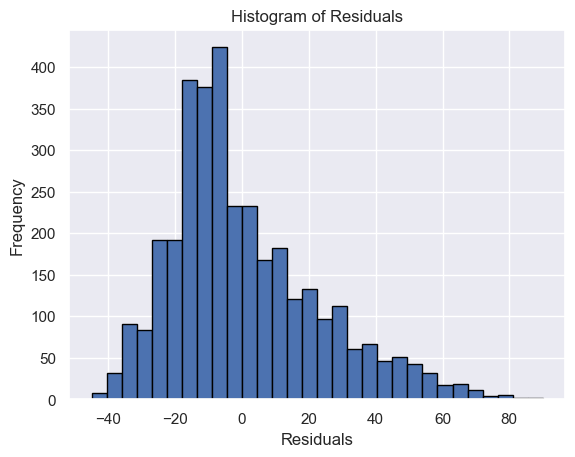

Average of Residuals: 0.1858355282411472
Average of Absolute Residuals: 17.627450980392158


In [20]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')


In [21]:
df_residuals.head()

,Actual,Predicted,Residuals
8217,5,21.0,-16.0
17015,11,21.0,-10.0
11423,75,39.0,36.0
1997,59,41.0,18.0
24412,18,30.0,-12.0


In [22]:
# Assuming df_residuals_sorted is your sorted DataFrame with 'Residuals' column
zero_residuals = df_residuals[df_residuals['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals
7033,25,25.0,0.0
14080,28,28.0,0.0
17479,40,40.0,0.0
23705,59,59.0,0.0
17813,20,20.0,0.0
23625,15,15.0,0.0
19733,39,39.0,0.0
1174,42,42.0,0.0
19037,17,17.0,0.0
24707,13,13.0,0.0


## ⬆︎⬆︎ GradientBoostingRegressor simple Mean Squared Error: 499.4585894059116
### Root Mean Squared Error: 22.33926425688135
### Average Days Staying: 32.247585601404744
### RMSE is less than Average Days Staying.
### Mean Absolute Error: 17.627450980392158
### R-squared Score: 0.279292
### Adjusted R-squared Score: 0.278024⬆︎⬆︎

## ⬇︎⬇︎ GradientBoostingRegressor with GridSearchCV  ⬇︎⬇︎

In [17]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your dataframe
selected_columns = [ 'age_intake_months', 
                    'breed_encoded', 'CoatColor_encoded', 
                     'CoatPattern_encoded', 'stay_length']
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('stay_length', axis=1)
y = df_selected['stay_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Use RandomOverSampler to handle imbalanced data
# ros = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
gb_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(gb_model.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 536.1173544044483
Root Mean Squared Error: 23.15420813598358
Average Days Staying: 32.247585601404744
RMSE is less than Average Days Staying.
Mean Absolute Error: 18.338601112086625
R-squared Score: 0.225749


In [18]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

age_intake_months      0.854943
CoatColor_encoded      0.064572
breed_encoded          0.045576
CoatPattern_encoded    0.034908
dtype: float64


In [19]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
8217,5,18.0,-13.0
17015,11,23.0,-12.0
11423,75,30.0,45.0
1997,59,40.0,19.0
24412,18,40.0,-22.0
7033,25,29.0,-4.0
9298,7,22.0,-15.0
17810,10,22.0,-12.0
21360,1,23.0,-22.0
6496,22,45.0,-23.0


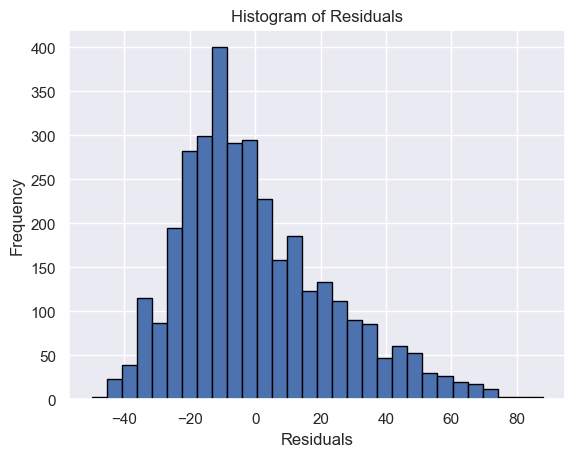

Average of Residuals: 0.1436932982148083
Average of Absolute Residuals: 18.338601112086625


In [20]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')


In [14]:
#  df_residuals
zero_residuals = df_residuals[df_residuals['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals
3045,25,25.0,0.0
1488,31,31.0,0.0
557,31,31.0,0.0
3121,17,17.0,0.0
1213,28,28.0,0.0
2238,17,17.0,0.0
2536,28,28.0,0.0
411,24,24.0,0.0
2548,41,41.0,0.0
2860,26,26.0,0.0


## ⬆︎⬆︎ GradientBoostingRegressor w GridSearchCV Mean Absolute Error: 15.35660091047041 & R-squared Score: 0.153738  ⬆︎⬆︎